# Formation Data-Science: 
## Introduction au Machine learning (Jour 1)

Auteurs : Joseph Salmon, Alexandre Gramfort

Ce notebook contient les éléments d'introduction au machine learning

# I - Prétraitement et visualiation sur *digits*

## Imports et intialisation

In [1]:
%matplotlib inline                      

import numpy as np                      # charge un package pour le numérique
import matplotlib.pyplot as plt         # charge un package pour les graphiques

## Description du jeu de données:
On charge le jeu de données *digits* disponible dans le package scikit-learn (nom d'import sklearn). Ce jeu de données contient des images de chiffres numérisés. On va s'en servir au cours de cette séance pour étudier les principaux enjeux en classification (supervisée).  

In [2]:
# Chargement des données disponible dans le package sklearn
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

print("Nombre de pixels :      {}".format(X.shape[1]))
print("Nombre d'observations : {}".format(X.shape[0]))
print("Nombre de classes :     {}".format(len(np.unique(y))))

# Choix d'une observation quelconque de la base
idx_to_test = 15

print("Affichage d'une ligne de la matrice / image:")
print(X[idx_to_test, :])
print("Affichage de la classe / chiffre associé:")
#print(y[idx_to_test])

Nombre de pixels :      64
Nombre d'observations : 1797
Nombre de classes :     10
Affichage d'une ligne de la matrice / image:
[  0.   5.  12.  13.  16.  16.   2.   0.   0.  11.  16.  15.   8.   4.   0.
   0.   0.   8.  14.  11.   1.   0.   0.   0.   0.   8.  16.  16.  14.   0.
   0.   0.   0.   1.   6.   6.  16.   0.   0.   0.   0.   0.   0.   5.  16.
   3.   0.   0.   0.   1.   5.  15.  13.   0.   0.   0.   0.   4.  15.  16.
   2.   0.   0.   0.]
Affichage de la classe / chiffre associé:


## EXERCICE:
Faites varier le choix de l'indice. Sans afficher la classe arrivez-vous à reconnaitre le chiffre représenté?

## Visualisation des observations:

Les images scannées sont de taille  8 x 8 et comportent donc 64 pixels chacune. Elles sont stockées sous la forme de vecteurs lignes, qu'il faut remettre dans un ordre lisible pour les identifier. L'affichage graphique est proposé avec les commandes qui suivent.


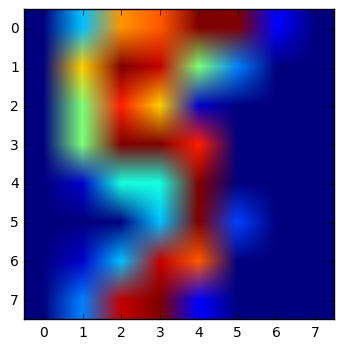

In [3]:
# Utilisation de la fonction imshow pour l'affichage de l'image numéro idx_to_test:
imgplot = plt.imshow(np.reshape(X[idx_to_test, :], (8, 8)))

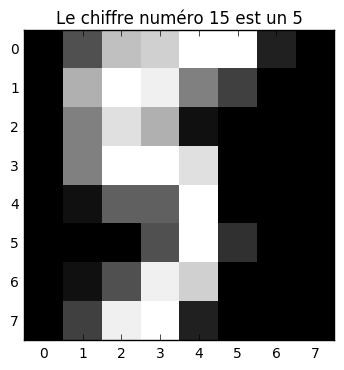

In [4]:
# Amélioration de la visualisation (niveau de gris) et de la légende:
imgplot = plt.imshow(np.reshape(X[idx_to_test, :], (8, 8)),
                     cmap='gray', aspect='equal', interpolation='nearest')

# Attention aux accents: ne pas oublier le u (Unicode) ci-dessous
plt.title(u'Le chiffre numéro %s est un %s' % (idx_to_test, y[idx_to_test]))


## Statistiques élementaires :
Pour mieux comprendre la base de données on va s'intéresser à quelques statistiques. 
On commence par calculer les moyennes et variances par classes pour chacun des chiffres. La moyenne par classe se visualise comme une image qui est une représentantion moyenne pour chaque chiffre de zéro à neuf. Idem pour la variance, ce qui permet alors de voir les parties avec les plus grandes variations entre les membres d'une même classe.


In [5]:
# Récupérer les modalités possibles prises (Il y en a bien 10!) 
classes_list = np.unique(y).astype(int)
print("Liste des classes en présence: ", classes_list)

Liste des classes en présence:  [0 1 2 3 4 5 6 7 8 9]


## EXERCICE:

- Calculer un représentant moyen du chiffre 0
- Avec une boucle `for` calculer le représentant moyen pour chaque chiffre

In [6]:
np.mean(X[y == 0, :], axis=0).shape

(64,)

## Solution

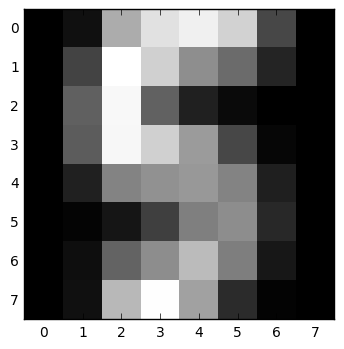

In [7]:
imgplot = plt.imshow(np.reshape(np.mean(X[y == 5, :], axis=0), (8, 8)),
                     cmap='gray', aspect='equal', interpolation='nearest')

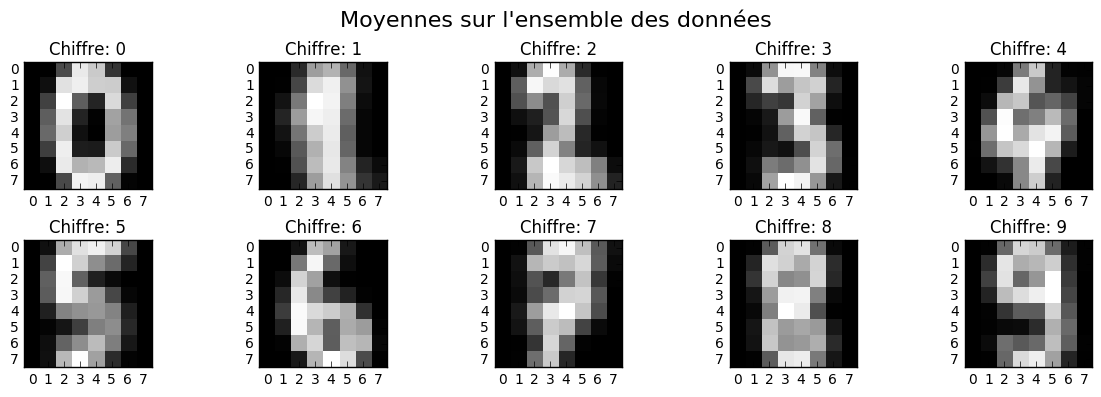

In [8]:
# Calculer un représentant moyen pour chaque chiffre 
Xi_mean = [np.mean(X[y == cls], axis=0) for cls in classes_list]

# Fonction d'affichage d'une liste d'image
def disp_pics(pic_list, title=''):
    """" Fonction qui affiche une liste d'image codée en vecteur """""
    fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 4))
    plt.suptitle(title, fontsize=16)
    for i in range(10):
        opt = dict(cmap='gray', aspect='equal', interpolation='nearest')
        axs.flat[i].imshow(pic_list[i].reshape(8, 8), **opt)
        axs.flat[i].set_title("Chiffre: %s" % i)
    # Contre-balancer l'affichage pas terrible de matplotlib
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)

# Affichage des images moyennes par classe pour les données  
disp_pics(Xi_mean, title=(u"Moyennes sur l'ensemble des données"))

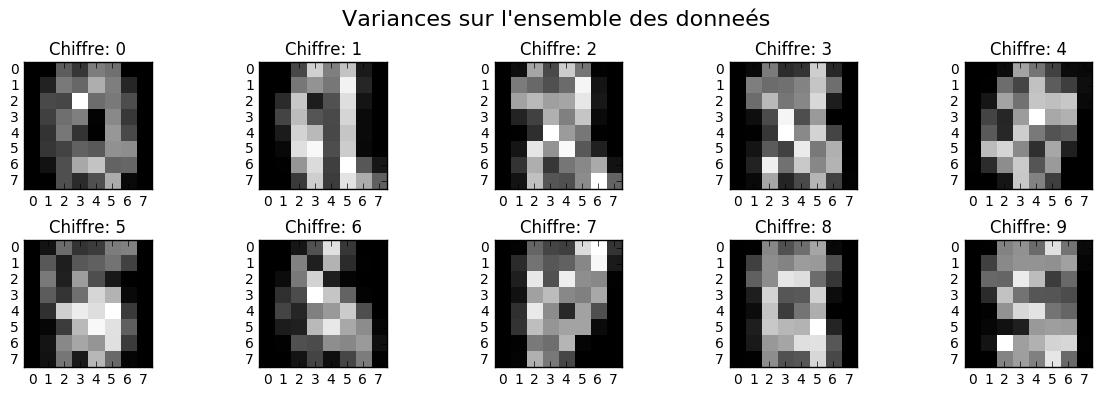

In [9]:
# Calcul de la variance par chiffre 
Xi_var = [np.var(X[y == cls], axis=0) for cls in classes_list]
# Affichage des images de variance par classe pour les données 
disp_pics(Xi_var, title=(u"Variances sur l'ensemble des donneés"))

# II - Premiers classifieurs

## Validation : découpage Apprentissage / Validation 

On procède de manière classique en réservant 80% des données pour la partie apprentissage, et 20% pour l'évaluation des classifieurs que l'on a construit sur la première partie.
En effet il n'est pas raisonnable de tester la performance sur 100% des données. Cela donnera lieu à du sur-apprentissage (en: overfitting). La généralisation des méthodes apprises serait alors très mauvaise

In [10]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                    random_state=0)
print("Nb d'échantillons d'apprentissage :  {}".format(X_train.shape[0]))
print("Nb d'échantillons de validation :    {}".format(X_test.shape[0]))


Nb d'échantillons d'apprentissage :  1437
Nb d'échantillons de validation :    360


## Mesures de performance

In [11]:
from sklearn.lda import LDA

clf = LDA()                  # choix de la méthode LDA comme premier classifieur
clf.fit(X_train, y_train)      # calibration de la méthode sur nos données
y_pred = clf.predict(X_test)   # prédiction de la méthode sur la partie à tester

# Chargement d'une mesure standard de performance
from sklearn.metrics import accuracy_score

# accuracy : pourcentage de bonnes predictions
print("Accuracy       : ", accuracy_score(y_test, y_pred))
print("Accuracy bis:  : ", np.mean(y_test == y_pred)) # mesure d'erreur 0/1

print("Le classifieur propose une bonne prédiction dans {} % des cas.".format(
      100 * accuracy_score(y_test, y_pred))) 

C:\Users\Peter martigny\Anaconda3\lib\site-packages\sklearn\lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


Accuracy       :  0.95
Accuracy bis:  :  0.95
Le classifieur propose une bonne prédiction dans 95.0 % des cas.


C:\Users\Peter martigny\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\Peter martigny\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


## EXERCICE:

- Construire un classifieur "naif" qui prédirait chaque chiffre entre 0 et 9 avec probabilité 0.1 (on pourra utiliser la commande np.random.randint). Mesurer sa performance sur l'échantillon test.

## Correction:

In [16]:
y_rand = np.random.randint(10, size=y_test.shape)
accuracy_score(y_rand, y_pred)

0.097222222222222224

### Précision et rappel

In [17]:
# Choix d'un chiffre:
chf = 8
print("Chiffre choisi: {} ".format(chf))

Chiffre choisi: 8 


In [18]:
# Chargement de deux autres mesure de performance
from sklearn.metrics import precision_score, recall_score

In [19]:
# Calcul de la précision:
precision_value = precision_score(y_test, y_pred,average=None)

print("Precision     : ", precision_value[chf])
print("Precision bis : ", np.mean(np.logical_and(y_pred == chf, y_test == chf)))

print("Le classifieur prédit le chiffre {0} "
      "avec raison dans {1:.2f} % de ses prédictions.\n"
      "Autrement dit, dans {2:.3f} % de ses prédictions le classifieur prédit {0} "
      "alors que le vrai chiffre est différent.\n".format(
      chf, 100 * precision_value[chf], 100 * (1 - precision_value[chf])))

Precision     :  0.904761904762
Precision bis :  0.105555555556
Le classifieur prédit le chiffre 8 avec raison dans 90.48 % de ses prédictions.
Autrement dit, dans 9.524 % de ses prédictions le classifieur prédit 8 alors que le vrai chiffre est différent.



In [20]:
# Calcul du rappel:
recall_value = recall_score(y_test, y_pred,average=None) # en Anglais rappel = recall

print("Rappel     : ", recall_value[chf])
print("Rappel bis : ", np.mean(np.logical_and(y_pred == chf, y_test == chf)))

print("Le classifieur prédit le chiffre {0} avec raison dans {1:.2f}"
      "% des cas où le vrai chiffre est un {0}.\n"
      "En revanche {2:.2f} % des chiffres qui sont vraiment des {0}"
      " sont prédits à tort par un autre chiffre.".format(
      chf, 100 * recall_value[chf], 100 * (1 - recall_value[chf])))

Rappel     :  0.974358974359
Rappel bis :  0.105555555556
Le classifieur prédit le chiffre 8 avec raison dans 97.44% des cas où le vrai chiffre est un 8.
En revanche 2.56 % des chiffres qui sont vraiment des 8 sont prédits à tort par un autre chiffre.


# EXERCICE: 
Afficher la précision et le rappel pour tous les valeurs de chiffre de 0 à 9 en utilisant une boucle "for" pour le classifieur que l'on vient de considérer.

## Résumé de ces éléments avec scikit-learn:

In [21]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98        27
          1       0.94      0.91      0.93        35
          2       1.00      0.92      0.96        36
          3       0.90      0.97      0.93        29
          4       0.97      0.97      0.97        30
          5       1.00      0.93      0.96        40
          6       1.00      0.98      0.99        44
          7       0.93      1.00      0.96        39
          8       0.90      0.97      0.94        39
          9       0.90      0.88      0.89        41

avg / total       0.95      0.95      0.95       360



# EXERCICE: 
Vérifier que la précision et le rappel moyen donnés dans le dernier tableau sont la moyenne de la précision et du rappel obtenus pour chaque chiffre. 

# III - Courbe d'apprentissage

Les courbes d'apprentissage permettent de quantifier le gain de performance obtenu en augmentant la taille des données. Cela permet de répondre à des questions comme:

- Ai-je assez de données?
- Mon modèle est-il assez complexe pour mon problème?

In [24]:
N_range

array([  15,   89,  164,  239,  314,  389,  464,  538,  613,  688,  763,
        838,  913,  987, 1062, 1137, 1212, 1287, 1362, 1437])

C:\Users\Peter martigny\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Peter martigny\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


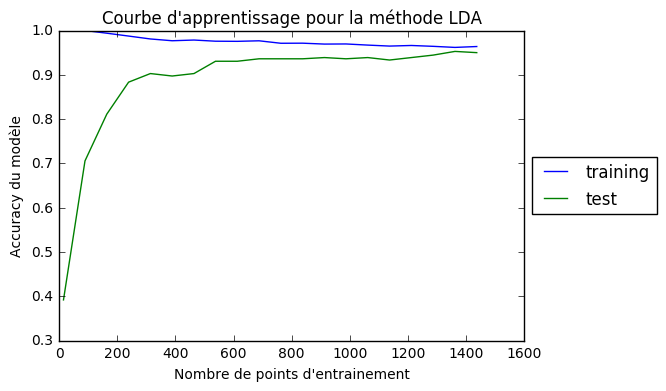

In [23]:
N_range = np.linspace(15, X_train.shape[0], 20).astype(int)

clf = LDA()   
clf_name = 'LDA'# choix de la méthode LDA comme premier classifieur

def plot_learning_curve(clf, clf_name):
    training_error = []
    test_error = []

    for N in N_range:
        XN = X_train[:N]
        yN = y_train[:N]
        clf.fit(XN, yN)        
        training_error.append(accuracy_score(clf.predict(XN), yN))
        test_error.append(accuracy_score(clf.predict(X_test), y_test))
    plt.figure()
    plt.plot(N_range, training_error, label='training')
    plt.plot(N_range, test_error, label='test')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(u'Courbe d\'apprentissage pour la méthode ' + clf_name)
    plt.xlabel('Nombre de points d\'entrainement')
    plt.ylabel('Accuracy du modèle')
    
plot_learning_curve(clf,clf_name)

# IV - Comparaison de performances de classifieurs

In [25]:
# Chargement d'une autre méthode de classification (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Liste des classifieurs évalués
classifiers = [('LDA', LDA()),
               ('KNN_k=1', KNeighborsClassifier(n_neighbors=1))]

##  Calcul des métriques de performance

Pour chaque classifieur on évalue la performance par le score sur les données de test et le temps d'exécution

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.grid_search import GridSearchCV

In [27]:
import pandas as pd        # charge un package pour le traitement des données
from timeit import timeit  # charge un package pour des mesures de temps


# Definition des métriques de performance
def perf_compute(clf, name, loops=10):
    """
    Calcule le temps d'apprentissage, de prediction, le score
    et la matrice de confusion d'un classifieur
    """
    # On initialise le conteneur
    perf = pd.Series(name=name)
    # On crée les callables qu'on passera à la fonction de profiling
    fit = lambda: clf.fit(X_train, y_train)
    score = lambda: clf.score(X_test, y_test)

    # On profile le temps des phases d'entrainement et de prédiction en ms
    perf['train_tps'] = timeit(fit, number=loops) / loops * 1000
    perf['test_tps'] = timeit(score, number=loops) / loops * 1000
    perf['total_tps'] = perf.train_tps + perf.test_tps
    # On calcule le score en pourcentage
    perf['score'] = fit().score(X_test, y_test) * 100
    # On calcule la matrice de confusion
    perf['conf_mat'] = [confusion_matrix(fit().predict(X_test), y_test)]
    # Normalisation par ligne de la matrice de confusion  pour avoir des pourcentages d'erreurs.
    # cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    return perf

In [28]:
# On lance le calcul de performance. On profile en bouclant 100 fois
perfs = pd.DataFrame([perf_compute(clf, name) for name, clf in classifiers])
perfs = perfs.sort('score')

perfs['train_tps test_tps total_tps score'.split()].T

C:\Users\Peter martigny\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\Peter martigny\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Peter martigny\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,LDA,KNN_k=1
train_tps,7.194122,5.155759
test_tps,0.240079,65.699080
total_tps,7.434201,70.854840
score,95.000000,98.888889


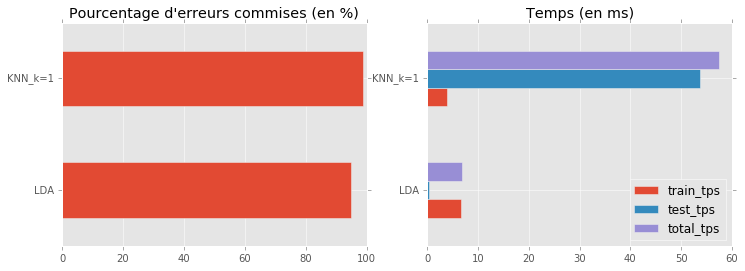

In [56]:
# Barplot des performances
plt.style.use('ggplot')    # sortie graphique améliorées (tester sans!)

fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
perfs['score'].plot(kind='barh',
                    title='Pourcentage d\'erreurs commises (en %)',
                    ax=axs[0])
perfs[['train_tps', 'test_tps', 'total_tps']].plot(kind='barh',
                                                   title='Temps (en ms)',
                                                   ax=axs[1])

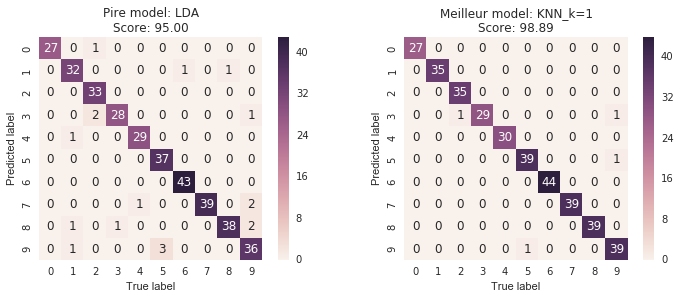

In [57]:
import seaborn as sns

def plot_conf_mat(perf, ax, title='Model'):
    """
    Affichage de la matrice de confusion
    """
    sns.heatmap(perf.conf_mat[0], ax=ax, square=True, annot=True)
    ax.set_title('{}: {}\nScore: {:.2f}'.format(title, perf.name, perf.score))
    ax.set_xlabel('True label')
    ax.set_ylabel('Predicted label')

# Affichage du plus mauvais et du meilleur classifieur
# Les classifieurs sont classés par scores croissant
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
plot_conf_mat(perfs.iloc[0], ax=axs[0], title='Pire model')
plot_conf_mat(perfs.iloc[-1], ax=axs[1], title='Meilleur model')

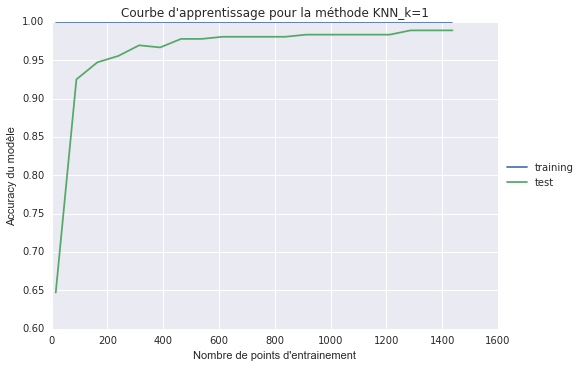

In [58]:
# courbe d'apprentissage pour KNN
plot_learning_curve(classifiers[1][1], classifiers[1][0])

# EXERCICE

* Tester d'autres modèles:

`from sklearn.naive_bayes import GaussianNB`

`from sklearn.svm import SVC`

`estimator = GaussianNB()`

`estimator = SVC(gamma=0.001)`


* Les résultats varient en fonction du découpage apprentissage/validation initial. Obtenez-vous des les même résultat :

    * en changeant la graine de l'aléa ('random_state=10')?

    * en changeant le ratio apprentissage/validation?

# EXERCICE

* Quelle valeur de k dans le k-NN donne la meilleure performance? Faire varier k entre 1 et 10 et afficher un graphique de performance en fonction de k.

* Il y a-t-il un compromis entre la performance de prédiction et le temps de calcul?